In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir = 'results/iris_2021-10-02_13:28:24'
filepath = os.path.join(dir, 'weights.csv')

weight_samples_pso = np.loadtxt(filepath)
weight_samples_pso.shape

(30000, 83)

In [5]:
idx = 31

In [6]:
import scipy.stats

from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [7]:
import re
pattern = 'weights_(.)*\.csv$'
weight_files = [fil for fil in os.listdir(dir) if re.match(pattern, fil)]

pop_size = 20

chain_traces = []

for i, fil in enumerate(weight_files):
    dat = np.loadtxt(os.path.join(dir, fil))
    samples = dat[:, idx].reshape(-1, pop_size).mean(axis=1).reshape(1, -1)
    chain_traces.append(samples)

chain_traces = np.concatenate(chain_traces, axis=0)


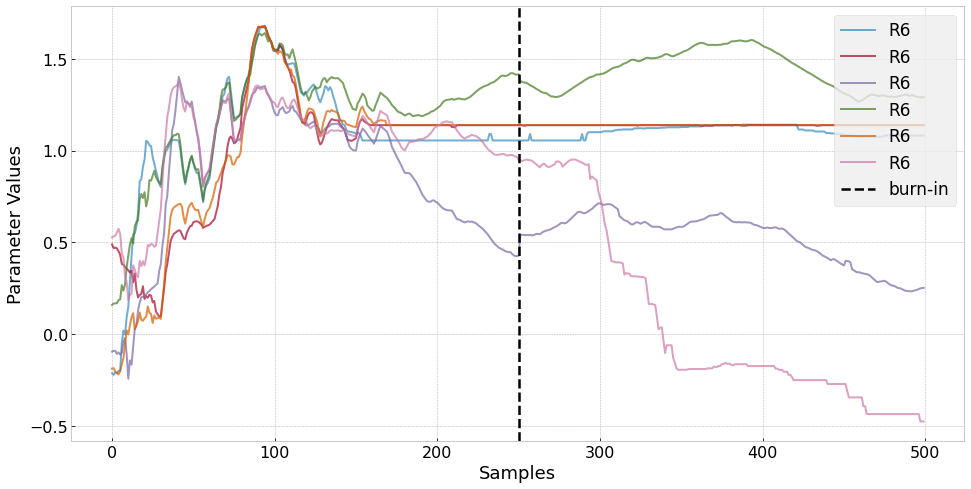

In [8]:

plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(16,8))

for trace in chain_traces:
    x = np.arange(0, len(trace))
    plt.plot(x, trace, label=f'R{i+1}', alpha=0.7)

plt.axvline(x=250, color='black', linestyle='--', lw=2.5, label='burn-in')

plt.ylabel('Parameter Values', fontsize=18)
plt.xlabel('Samples', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_facecolor((1.0, 1.0, 1.0))

plt.legend(loc='upper right', fontsize=17)
plt.show()

In [12]:
PT_dir = '/home/arpit/projects/PT/PT_EvalSwapRW/iris_2/posterior/pos_w'
files = os.listdir(PT_dir)

burn_in = 0.5

weight_samples_lg = []

for i, fil in enumerate(files):
    dat = np.loadtxt(os.path.join(PT_dir, fil))
    num_samples = len(dat)

    weight_samples_lg.append(dat[int(num_samples*burn_in):])


weight_samples_lg = np.concatenate(weight_samples_lg, axis=0)
    

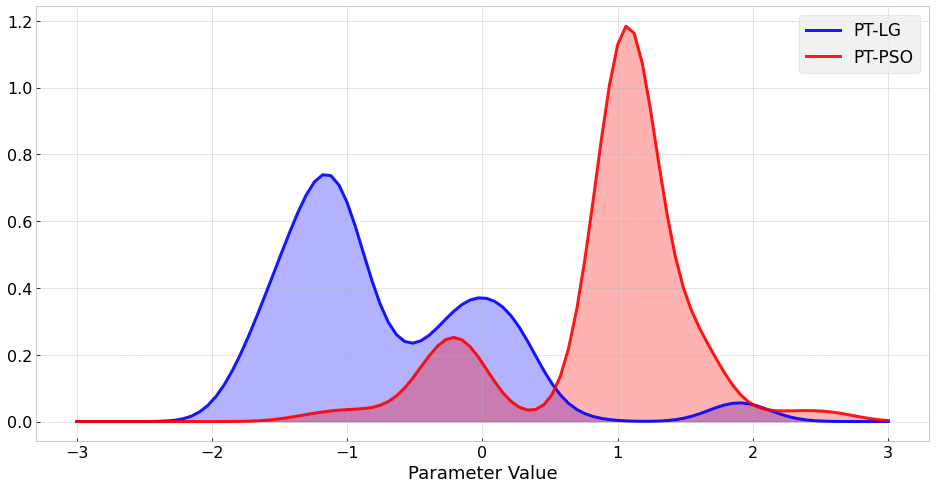

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

fig, ax = plt.subplots(figsize=(16,8))

y1 = weight_samples_lg[:, idx].ravel()
y2 = weight_samples_pso[:, idx].ravel()

size1 = len(y1)
size2 = len(y2)

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
# h = plt.hist(y, bins=30, density=True, alpha=0.65, color='C0')

pdf1 = kde_scipy(y1, x1, bandwidth=0.2)
pdf2 = kde_scipy(y2, x2, bandwidth=0.2)


plt.plot(x1, pdf1, color='blue', alpha=0.9, lw=3, label='PT-LG')
plt.fill_between(x1, np.zeros(pdf1.shape), pdf1, alpha=0.3, color='blue')

plt.plot(x2, pdf2, color='red', alpha=0.9, lw=3, label='PT-PSO')
plt.fill_between(x2, np.zeros(pdf2.shape), pdf2, alpha=0.3, color='red')


plt.xlabel('Parameter Value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_facecolor((1.0, 1.0, 1.0))

plt.legend(loc='upper right', fontsize=17)
plt.show()